# Capital BikeShare System Data Exploration Part II
### by Clarence Beling

## Investigation Overview
In this investigation, we wanted to look at the characteristics of bikes that could be used to predict the best performances. The main focus was on this four things : time, type, races and its participants count.


## Dataset Overview
The data consisted of information regarding 158,130 bike records by race, including times, stations and bike qualities. This is a Washington DC Metro Area dataset of February 2019, but we needed extraction of bikes and races data, due to incompleteness of information, to continue exploration.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_style('darkgrid')

import warnings
warnings.simplefilter("ignore")

In [2]:
# reducing repetitive code

cat_markers = [['Member', 'o'],
               ['Casual', 's']]

def count_plot(df, string, up, order_counts) :
    sb.countplot(data = df, x = string, color = sb.color_palette()[0],  order = order_counts.index)
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = order_counts[label.get_text()]
        string = '{}'.format(count)
        plt.text(loc, count+up, string, ha = 'center', color = 'black')
    plt.yticks([])
    plt.ylabel('Count')

In [3]:
# load in the dataset into a pandas dataframe

capital_bikeshare_clean = pd.read_csv('capital-bikeshare-clean.csv')
capital_bike = pd.read_csv('capital-bike.csv')
capital_race = pd.read_csv('capital-race.csv')

## Distribution of Biker Types
In the three dataset, biker type has two variables whose Member is majority and Casual is minority.

1) The first plot show the participation in the whole tournament ;

2) The second plot show the bikes of the tournament ;

3) The third plot show the winners of the tournament.

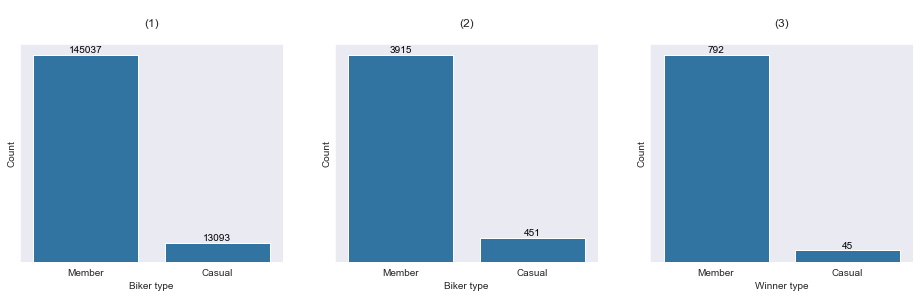

In [4]:
# showing three plots of biker types count

plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
order_counts_1 = capital_bikeshare_clean['biker_type'].value_counts()
count_plot(capital_bikeshare_clean, 'biker_type', 1300, order_counts_1)
plt.xlabel('Biker type')
plt.title('\n(1)\n')

plt.subplot(1, 3, 2)
order_counts_2 = capital_bike['biker_type'].value_counts()
count_plot(capital_bike, 'biker_type', 38, order_counts_2)
plt.xlabel('Biker type')
plt.title('\n(2)\n')

plt.subplot(1, 3, 3)
order_counts_3 = capital_race['winner_type'].value_counts()
count_plot(capital_race, 'winner_type', 6, order_counts_3)
plt.xlabel('Winner type')
plt.title('\n(3)\n')
plt.show()

## Distribution of Durations
In the main dataset, durations has a long-tail distribution, with many short-time bikers and few long-time bikers. When plotted on a logarithmic scale, this distribution appears roughly unimodal, with a peak between 350 and 1,000.

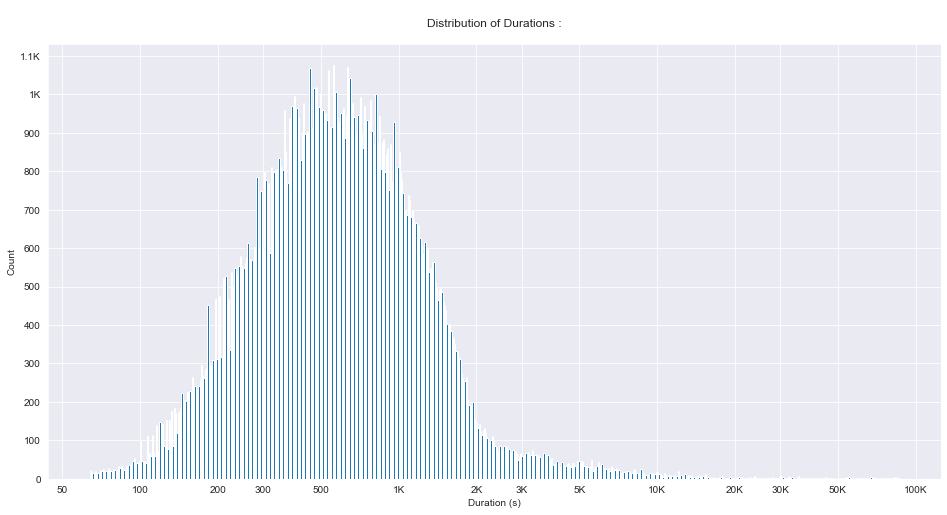

In [5]:
# plotting count of durations in the whole tournament, with a log scale

bins = 10 ** np.arange(1.8, np.log10(capital_bikeshare_clean['duration_sec'].max())+0.005, 0.005)

plt.figure(figsize=[16, 8])
plt.hist(data = capital_bikeshare_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 200, 300, 500, 1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4, 1e5], [50, 100, 200, 300, 500, '1K', '2K', '3K', '5K', '10K', '20K', '30K', '50K', '100K'])
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1e3, 1.1e3], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, '1K', '1.1K'])
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('\nDistribution of Durations :\n')
plt.show()

## Distribution Durations vs Biker types
There we used three differents plots to view differents values of biker type in the main dataset, with the two maxs going over 80,000. In the violinplot, we can see that the Member biker type is larger than the Casual biker type. The boxplot show the values of the description (max, std, 75%, 50%, 25% and min). And there is averages of those two values in the barplot.

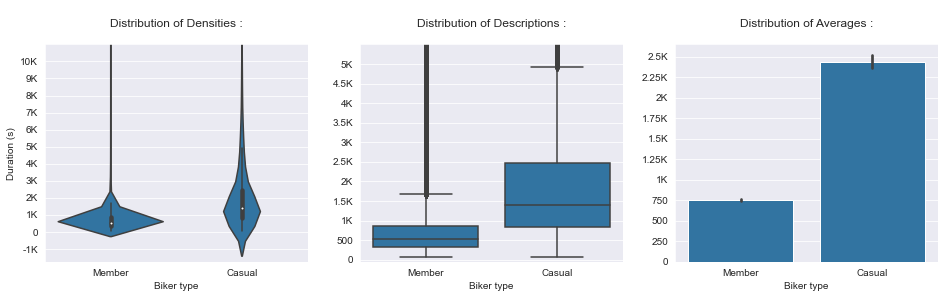

In [6]:
# plotting three descriptions of durations for biker types in the whole tournament

plt.figure(figsize = [16, 4])

plt.subplot(1, 3, 1)
sb.violinplot(data = capital_bikeshare_clean, x = 'biker_type', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('Biker type')
plt.ylabel('Duration (s)')
plt.ylim([-1750, 11000])
plt.yticks([-1e3, 0, 1e3,  2e3, 3e3, 4e3, 5e3, 6e3, 7e3, 8e3, 9e3, 1e4], ['-1K', 0, '1K', '2K', '3K', '4K', '5K', '6K', '7K', '8K', '9K', '10K'])
plt.title('\nDistribution of Densities :\n')

plt.subplot(1, 3, 2)
sb.boxplot(data = capital_bikeshare_clean, x = 'biker_type', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('Biker type')
plt.ylabel('')
plt.ylim([-50, 5500])
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], [0, 500, '1K', '1.5K', '2K', '2.5K', '3K', '3.5K', '4K', '4.5K', '5K'])
plt.title('\nDistribution of Descriptions :\n')

plt.subplot(1, 3, 3)
sb.barplot(data = capital_bikeshare_clean, x = 'biker_type', y = 'duration_sec', color = sb.color_palette()[0])
plt.xlabel('Biker type')
plt.ylabel('')
plt.yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500], [0, 250, 500, 750, '1K', '1.25K', '1.5K', '1.75K', '2K', '2.25K', '2.5K'])
plt.title('\nDistribution of Averages :\n')
plt.show()

## Distribution of Races vs Participants vs Biker types
In the race dataset, we plotted the lines of races and their participants. We can see in this distribution that each biker type decrease as the races follow each another.

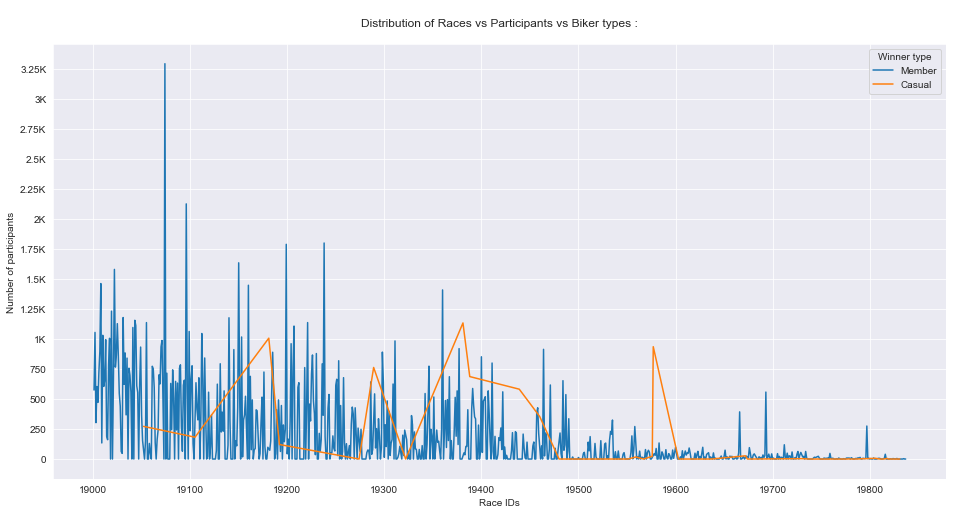

In [7]:
# plotting races vs participants vs biker types

plt.figure(figsize = [16, 8])
for cat, marker in cat_markers :
    cat_df = capital_race.query('winner_type == "{}"'.format(cat))
    plt.errorbar(data = cat_df, x = 'race_id', y = 'participants')
plt.xticks([19000, 19100, 19200, 19300, 19400, 19500, 19600, 19700, 19800])
plt.yticks([0, 250, 500, 750, 1e3, 1.25e3, 1.5e3, 1.75e3, 2e3, 2.25e3, 2.5e3, 2.75e3, 3e3, 3.25e3], [0, 250, 500, 750, '1K', '1.25K', '1.5K', '1.75K', '2K', '2.25K', '2.5K', '2.75K', '3K', '3.25K'])
plt.xlabel('Race IDs')
plt.ylabel('Number of participants')
plt.legend(['Member', 'Casual'], title = 'Winner type')
plt.title('\nDistribution of Races vs Participants vs Biker types :\n')
plt.show()

## Distribution of Races vs Winners Times vs Biker types
In race dataset, we plotted in a logarithmic scale the winner time distribution. It show us its linearity with races accross biker type. We can see Member biker type along but Casual biker type show up as line progress.

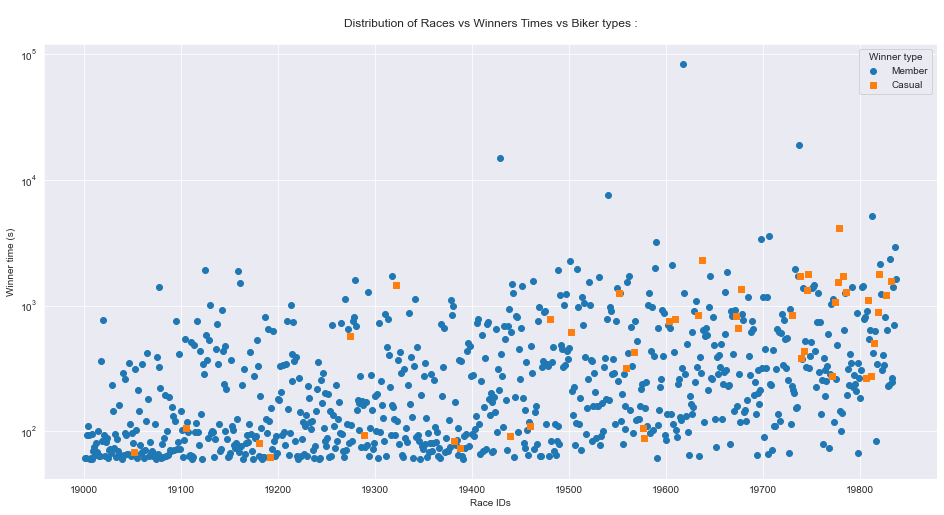

In [8]:
# plotting races vs winner times vs winner type

plt.figure(figsize = [16, 8])
for cat, marker in cat_markers :
    df_cat = capital_race.query('winner_type == "{}"'.format(cat))
    plt.scatter(data = df_cat, x = 'race_id', y = 'winner_time', marker = marker)
plt.xticks([19000, 19100, 19200, 19300, 19400, 19500, 19600, 19700, 19800])
plt.xlabel('Race IDs')
plt.ylabel('Winner time (s)')
plt.yscale('log')
plt.legend(['Member', 'Casual'], title = 'Winner type')
plt.title('\nDistribution of Races vs Winners Times vs Biker types :\n')
plt.show()

In [ ]:
# Converting the IPython Notebook file to slides

!jupyter nbconvert Capital_BikeShare_System_Part_II.ipynb --to slides --post serve --no-input --no-prompt